In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.optimize import curve_fit
import pandas as pd
import seaborn as sns
from my_utils.my_utils import printMD

## No Grid + Plex

In [2]:
degree_of_rotation = 2.2
file = uproot.open("root_files/gopa3+50+-ped.root")
w, _1, _2 = file["h7"].to_numpy()
w_new = ndimage.rotate(w, degree_of_rotation, reshape=False).T
w_markers = w_new[2:75, 45:119]
w_left  = w_new[61:71, 49:81]
w_right = w_new[18:28, 73:119]
print(f"left: {w_left.shape}, right: {w_right.shape}")


left: (10, 32), right: (10, 46)


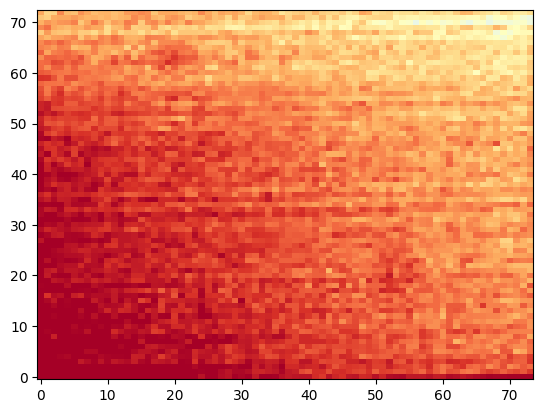

In [17]:
w_cm = w_markers
y_cm = range(w_cm.shape[0])   # Rows      (this, _)
x_cm = range(w_cm.shape[1])   # Columns   (_, this)
plt.pcolormesh(x_cm, y_cm, w_cm, cmap="RdYlBu", vmin=0, vmax=80)
# plt.grid()
plt.show()

### **Left Marker**

### **Fitting line to one marker**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


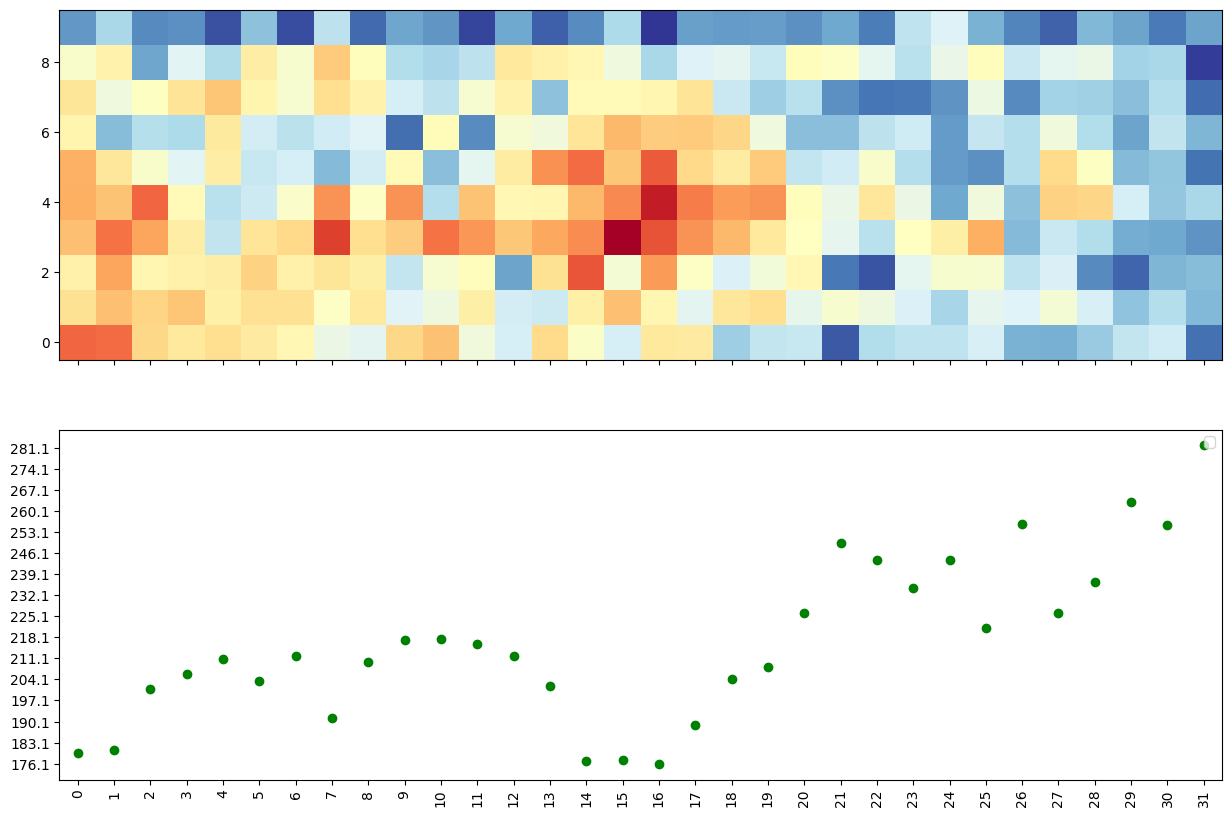

In [4]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Upper pcolormesh
w_markers_cropped = w_left
y_markers_markers_cropped = range(w_markers_cropped.shape[0])   # Rows      (this, _)
x_markers_markers_cropped = range(w_markers_cropped.shape[1])   # Columns   (_, this)

ax[0].pcolormesh(x_markers_markers_cropped, y_markers_markers_cropped, w_markers_cropped, cmap="RdYlBu")
plt.xticks(x_markers_markers_cropped, rotation=90)
plt.yticks(y_markers_markers_cropped)

# Lower scatterplot
_axis = 0 # 0 - keeps x; 1 - keeps y
w_markers_summed = w_markers_cropped.sum(axis=_axis)
x_markers_summed = np.arange(len(w_markers_summed))
## Fitted line
printMD("### **Fitting line to one marker**")
ax[1].scatter(x_markers_summed, w_markers_summed, c='green')
plt.legend()
plt.yticks(np.arange(w_markers_summed.min(), w_markers_summed.max(), 7))
plt.show()

**Results report**

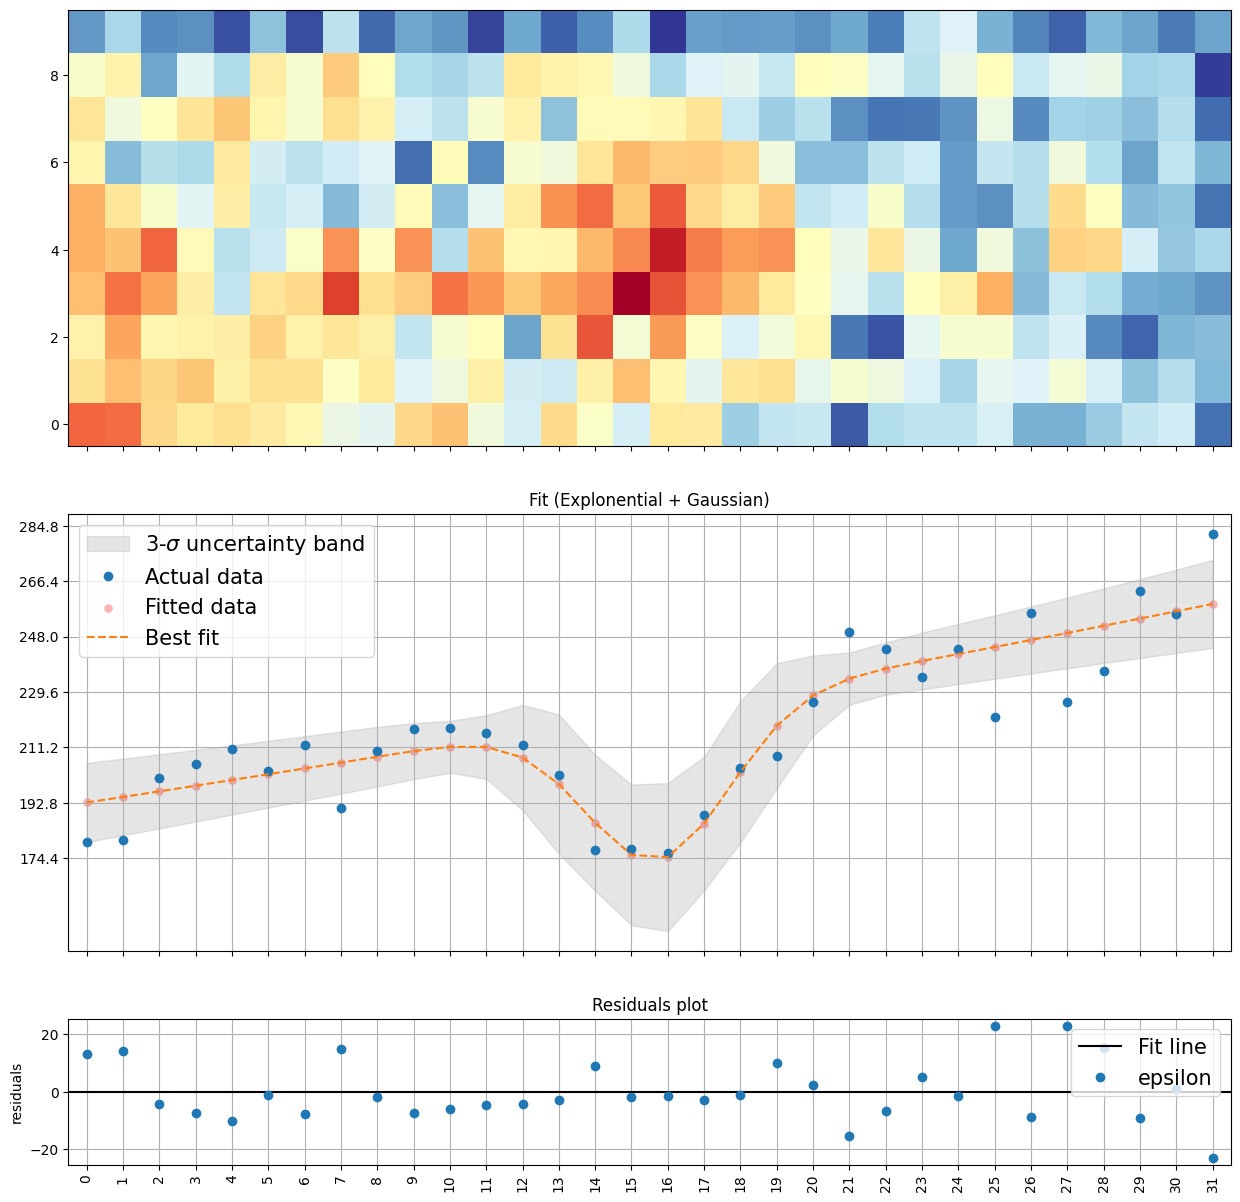

name,value,standard error,relative error,initial value,min,max,vary,expression
exp_amplitude,192.901895,3.97653800,(2.06%),185.7640607310962,-inf,inf,True,
exp_decay,-105.461914,11.0114353,(10.44%),-106.21778532184186,-inf,inf,True,
g1_amplitude,-247.435999,44.9077142,(18.15%),1.0,-inf,inf,True,
g1_center,15.7278463,0.34063255,(2.17%),15,13.0000000,18.0000000,True,
g1_sigma,1.96599460,0.36384574,(18.51%),2,0.50000000,5.00000000,True,
g1_fwhm,4.62956341,0.85679122,(18.51%),4.70964,-inf,inf,False,2.3548200*g1_sigma
g1_height,-50.2100497,7.66189605,(15.26%),0.19947115,-inf,inf,False,"0.3989423*g1_amplitude/max(1e-15, g1_sigma)"


In [8]:
from lmfit.models import GaussianModel, ExponentialModel

# Data
# w_markers = w_new[152:225, 45:119]
w_markers_cropped = w_left
y_markers_markers_cropped = range(w_markers_cropped.shape[0])   # Rows      (this, _)
x_markers_markers_cropped = range(w_markers_cropped.shape[1])   # Columns   (_, this)
w_markers_summed = w_markers_cropped.sum(axis=_axis)
x_markers_summed = np.arange(len(w_markers_summed))

# Model 
exp_mod = ExponentialModel(prefix='exp_')
pars = exp_mod.guess(w_markers_summed, x=x_markers_summed)

gauss1 = GaussianModel(prefix='g1_')
pars.update(gauss1.make_params())

pars['g1_center'].set(value=15, min=13, max=18)
pars['g1_sigma'].set(value=2, min=0.5, max=5)

mod = gauss1 + exp_mod
init = mod.eval(pars, x=x_markers_summed)
out = mod.fit(w_markers_summed, pars, x=x_markers_summed)

# Printing section
fig, ax = plt.subplots(3, 1, figsize=(15, 15), sharex=True, gridspec_kw={'height_ratios': [3, 3, 1]})

# Colormesh
printMD("**Results report**")
ax[0].pcolormesh(x_markers_markers_cropped, y_markers_markers_cropped, w_markers_cropped, cmap="RdYlBu")
plt.xticks(x_markers_markers_cropped, rotation=90)

# Fitted graph
## Uncertainty
dely = out.eval_uncertainty(sigma=3)
ax[1].fill_between(x_markers_summed, 
                 out.best_fit-dely, 
                 out.best_fit+dely, 
                 color="#ABABAB",
                 label='3-$\sigma$ uncertainty band', 
                 alpha=0.3)
## Graph itself
ax[1].plot(x_markers_summed, out.data, 'o', label='Actual data')
ax[1].scatter(x_markers_summed, out.best_fit, label='Fitted data', c='r', alpha=0.3, linewidths=0.1)
ax[1].plot(x_markers_summed, out.best_fit, '--', label='Best fit')
ax[1].set_yticks(np.linspace(out.data.min()-out.data.min()*0.01, 
                             out.data.max()+out.data.max()*0.01, 
                             7))
ax[1].grid()
ax[1].set_title("Fit (Explonential + Gaussian)")
ax[1].legend(fontsize=15)

# Residuals
out.plot_residuals(ax=ax[2], title="Residuals plot")
ax[2].grid()
ax[2].legend(['Fit line', 'epsilon'], fontsize=15)

plt.show()

out.params

### **Right Marker** 

### **Fitting line to one marker**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


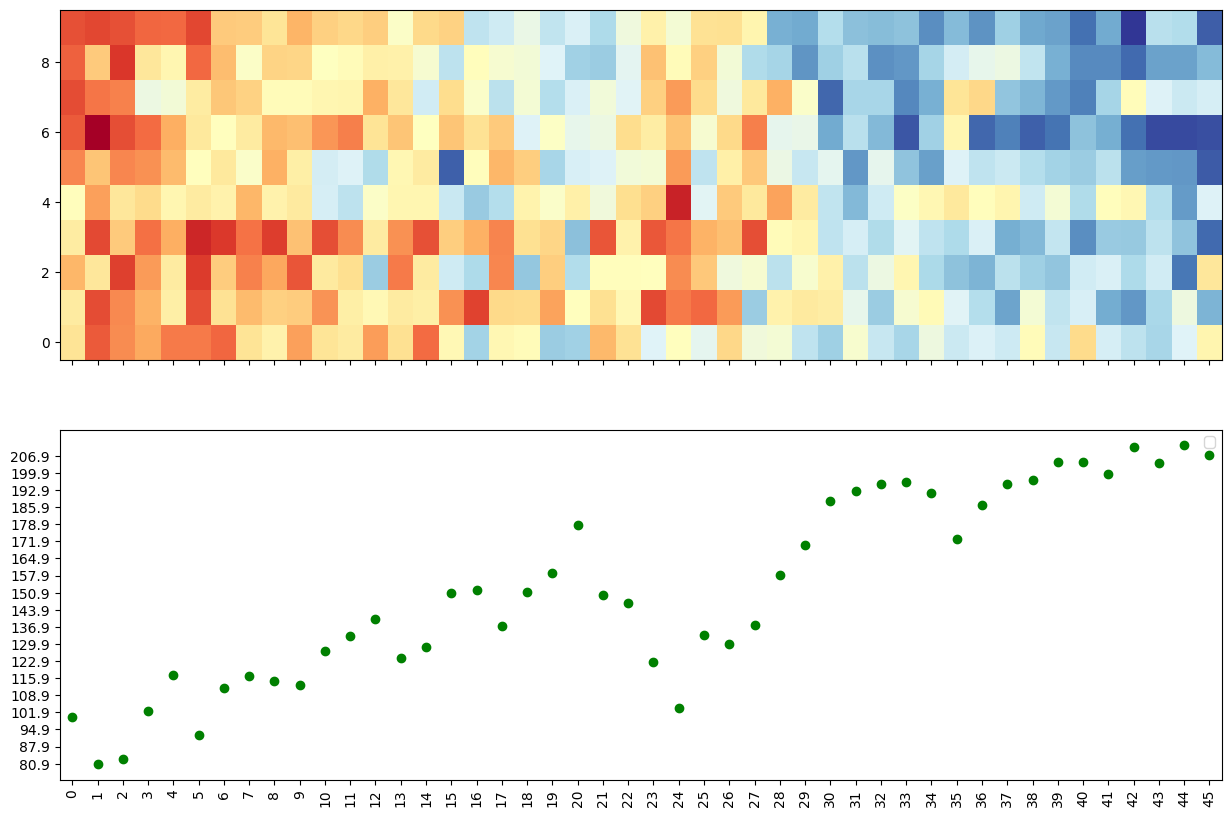

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Upper pcolormesh
w_markers_cropped = w_right
y_markers_markers_cropped = range(w_markers_cropped.shape[0])   # Rows      (this, _)
x_markers_markers_cropped = range(w_markers_cropped.shape[1])   # Columns   (_, this)

ax[0].pcolormesh(x_markers_markers_cropped, y_markers_markers_cropped, w_markers_cropped, cmap="RdYlBu")
plt.xticks(x_markers_markers_cropped, rotation=90)
plt.yticks(y_markers_markers_cropped)

# Lower scatterplot
_axis = 0 # 0 - keeps x; 1 - keeps y
w_markers_summed = w_markers_cropped.sum(axis=_axis)
x_markers_summed = np.arange(len(w_markers_summed))
## Fitted line
printMD("### **Fitting line to one marker**")
ax[1].scatter(x_markers_summed, w_markers_summed, c='green')
plt.legend()
plt.yticks(np.arange(w_markers_summed.min(), w_markers_summed.max(), 7))
plt.show()

**Results report**

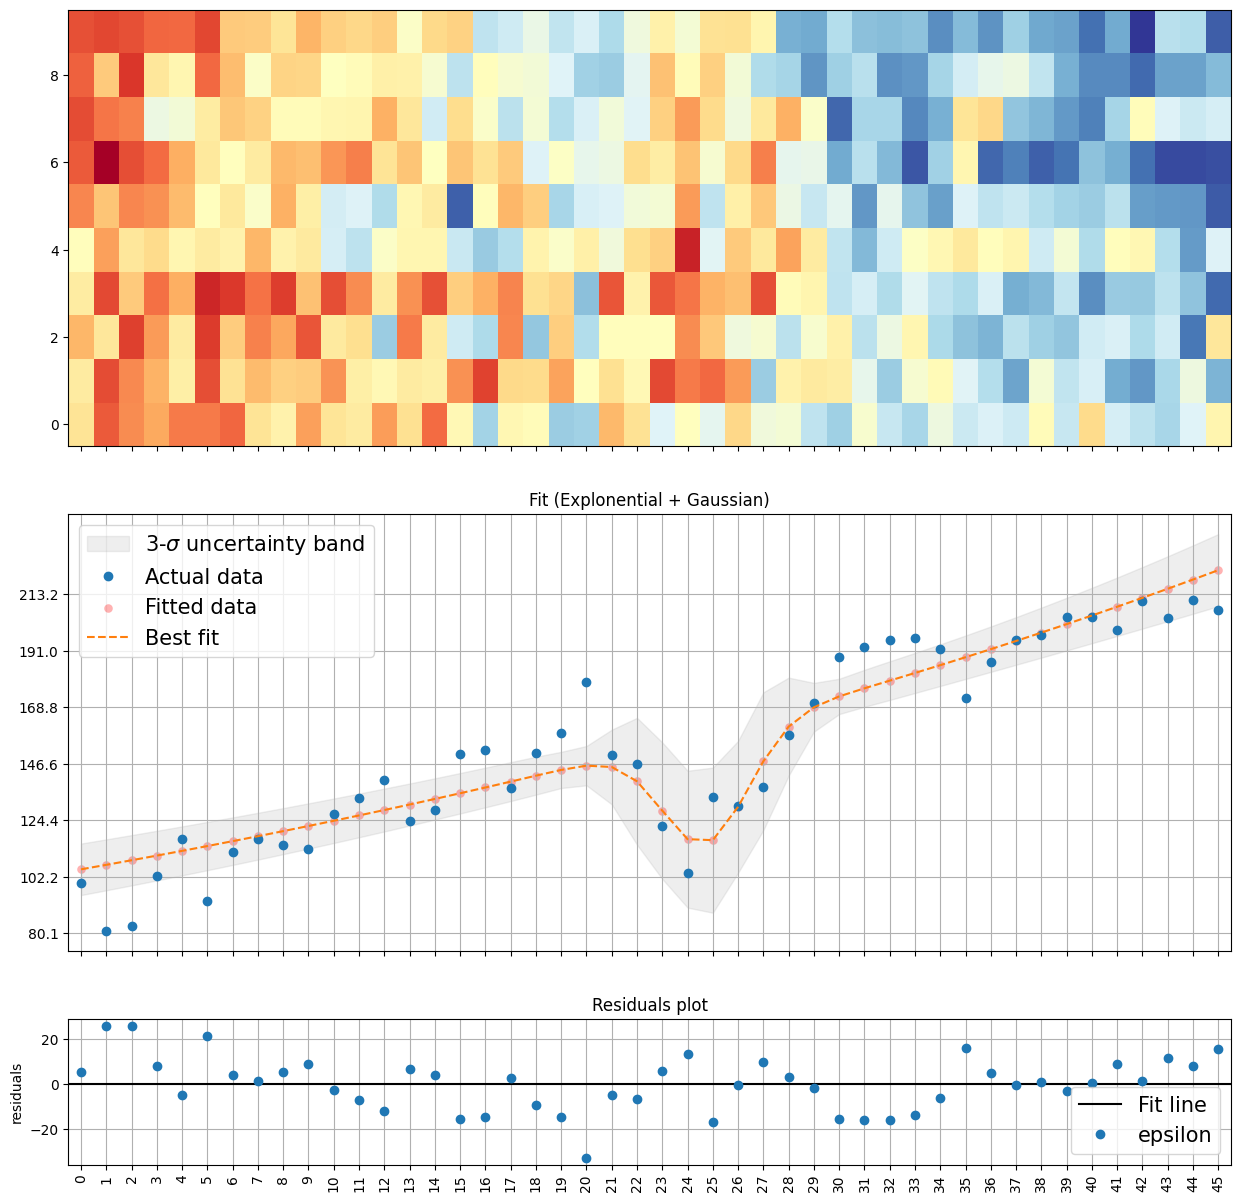

name,value,standard error,relative error,initial value,min,max,vary,expression
exp_amplitude,105.157261,3.17048923,(3.01%),98.47356039279032,-inf,inf,True,
exp_decay,-59.9629579,3.38161314,(5.64%),-55.61799281825603,-inf,inf,True,
g1_amplitude,-184.314620,42.6929740,(23.16%),1.0,-inf,inf,True,
g1_center,24.7083358,0.40333916,(1.63%),24,23.0000000,28.0000000,True,
g1_sigma,1.68705960,0.41930435,(24.85%),1.7,0.50000000,4.00000000,True,
g1_fwhm,3.97272169,0.98738628,(24.85%),4.003194,-inf,inf,False,2.3548200*g1_sigma
g1_height,-43.5852406,9.13270168,(20.95%),0.2346719411764706,-inf,inf,False,"0.3989423*g1_amplitude/max(1e-15, g1_sigma)"


In [13]:
from lmfit.models import GaussianModel, ExponentialModel

w_markers_cropped = w_right
y_markers_markers_cropped = range(w_markers_cropped.shape[0])   # Rows      (this, _)
x_markers_markers_cropped = range(w_markers_cropped.shape[1])   # Columns   (_, this)
w_markers_summed = w_markers_cropped.sum(axis=_axis)
x_markers_summed = np.arange(len(w_markers_summed))

# Model 
exp_mod = ExponentialModel(prefix='exp_')
pars = exp_mod.guess(w_markers_summed, x=x_markers_summed)

gauss1 = GaussianModel(prefix='g1_')
pars.update(gauss1.make_params())

pars['g1_center'].set(value=24, min=23, max=28)
pars['g1_sigma'].set(value=1.7, min=0.5, max=4)

mod = gauss1 + exp_mod
init = mod.eval(pars, x=x_markers_summed)
out = mod.fit(w_markers_summed, pars, x=x_markers_summed)

# Printing section
fig, ax = plt.subplots(3, 1, figsize=(15, 15), sharex=True, gridspec_kw={'height_ratios': [3, 3, 1]})

# Colormesh
printMD("**Results report**")
ax[0].pcolormesh(x_markers_markers_cropped, y_markers_markers_cropped, w_markers_cropped, cmap="RdYlBu")
plt.xticks(x_markers_markers_cropped, rotation=90)

# Fitted graph
## Uncertainty
dely = out.eval_uncertainty(sigma=3)
ax[1].fill_between(x_markers_summed, 
                 out.best_fit-dely, 
                 out.best_fit+dely, 
                 color="#ABABAB",
                 label='3-$\sigma$ uncertainty band',
                 alpha=0.2)
## Graph itself
ax[1].plot(x_markers_summed, out.data, 'o', label='Actual data')
ax[1].scatter(x_markers_summed, out.best_fit, label='Fitted data', c='r', alpha=0.3, linewidths=0.1)
ax[1].plot(x_markers_summed, out.best_fit, '--', label='Best fit')
ax[1].set_yticks(np.linspace(out.data.min()-out.data.min()*0.01, 
                             out.data.max()+out.data.max()*0.01, 
                             7))
ax[1].grid()
ax[1].set_title("Fit (Explonential + Gaussian)")
ax[1].legend(fontsize=15)

# Residuals
out.plot_residuals(ax=ax[2], title="Residuals plot")
ax[2].grid()
ax[2].legend(['Fit line', 'epsilon'], fontsize=15)

plt.show()

out.params

### **Left Marker's place**

### **Fitting line to one marker**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


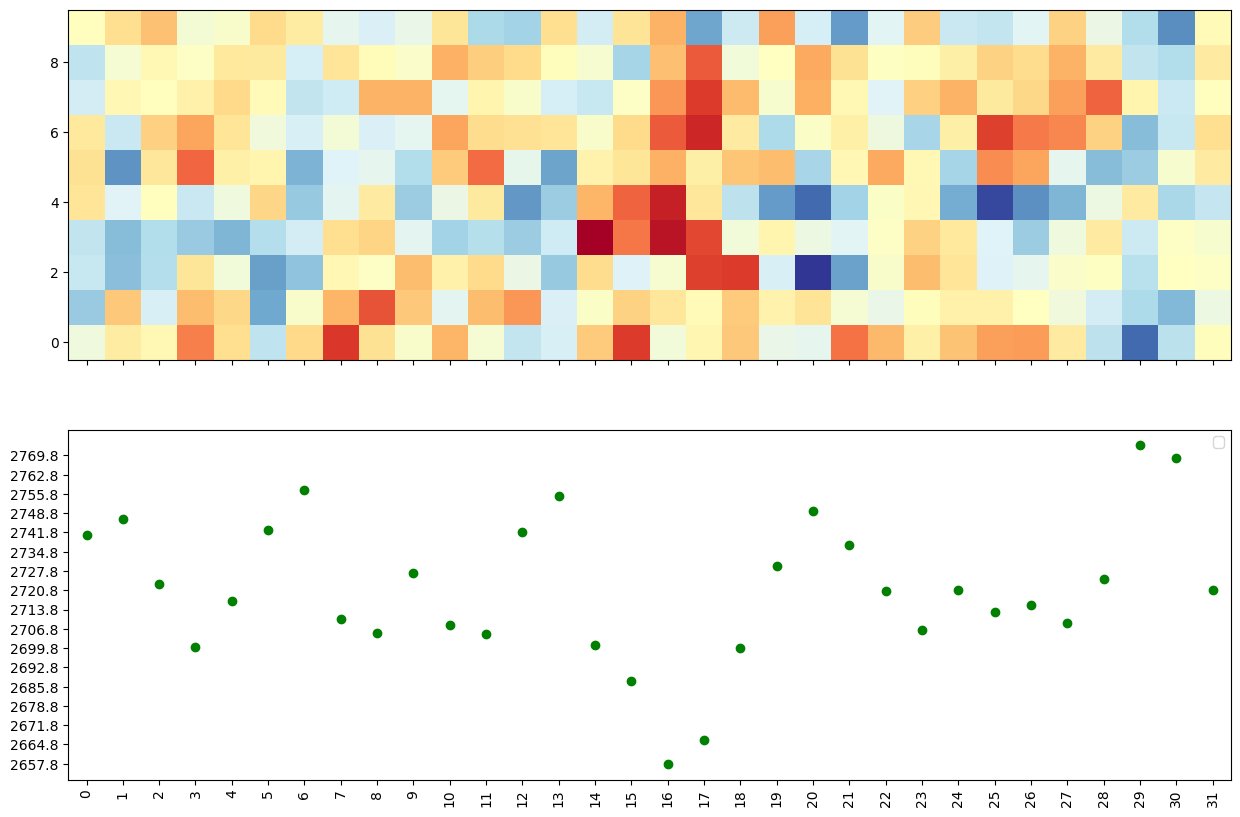

In [3]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Upper pcolormesh
w_markers_cropped = w_left
y_markers_markers_cropped = range(w_markers_cropped.shape[0])   # Rows      (this, _)
x_markers_markers_cropped = range(w_markers_cropped.shape[1])   # Columns   (_, this)

ax[0].pcolormesh(x_markers_markers_cropped, y_markers_markers_cropped, w_markers_cropped, cmap="RdYlBu")
plt.xticks(x_markers_markers_cropped, rotation=90)
plt.yticks(y_markers_markers_cropped)

# Lower scatterplot
_axis = 0 # 0 - keeps x; 1 - keeps y
w_markers_summed = w_markers_cropped.sum(axis=_axis)
x_markers_summed = np.arange(len(w_markers_summed))
## Fitted line
printMD("### **Fitting line to one marker**")
ax[1].scatter(x_markers_summed, w_markers_summed, c='green')
plt.legend()
plt.yticks(np.arange(w_markers_summed.min(), w_markers_summed.max(), 7))
plt.show()

**Results report**

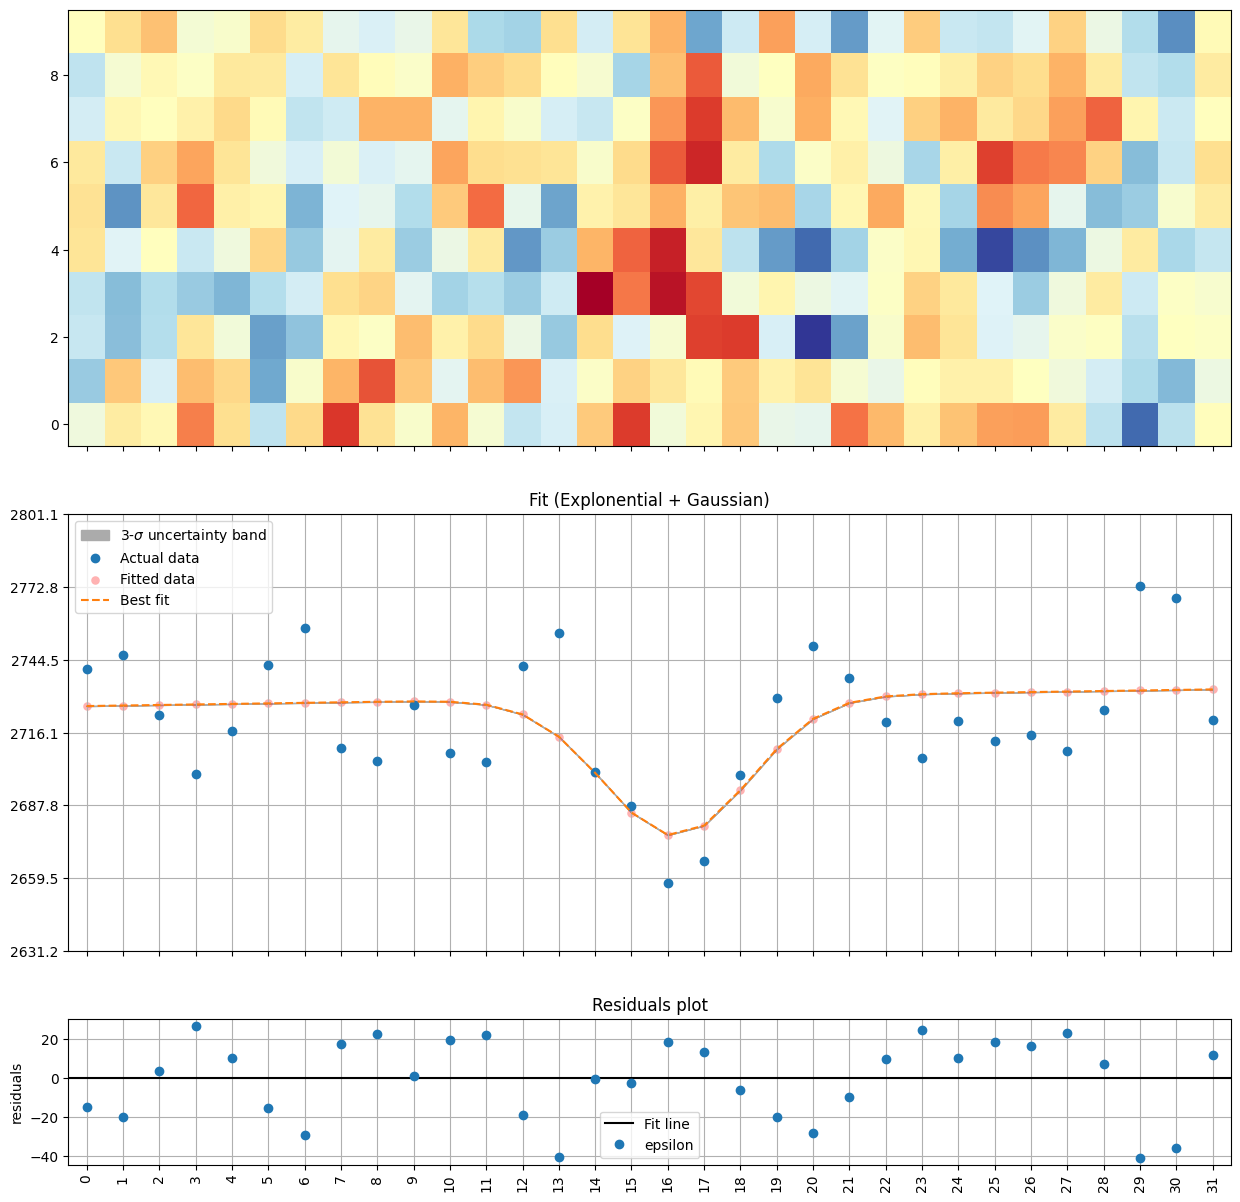

name,value,initial value,min,max,vary,expression
exp_amplitude,2726.47340,2719.072541233604,-inf,inf,True,
exp_decay,-13059.5027,-20312.913973204813,-inf,inf,True,
g1_amplitude,-270.120387,1.0,-inf,inf,True,
g1_center,16.2310214,17,14.0000000,20.0000000,True,
g1_sigma,2.00000001,4,2.00000000,inf,True,
g1_fwhm,4.70964002,9.41928,-inf,inf,False,2.3548200*g1_sigma
g1_height,-53.8812240,0.099735575,-inf,inf,False,"0.3989423*g1_amplitude/max(1e-15, g1_sigma)"


In [4]:
from lmfit.models import GaussianModel, ExponentialModel

# Data
# w_markers = w_new[152:225, 45:119]
w_markers_cropped = w_left
y_markers_markers_cropped = range(w_markers_cropped.shape[0])   # Rows      (this, _)
x_markers_markers_cropped = range(w_markers_cropped.shape[1])   # Columns   (_, this)
w_markers_summed = w_markers_cropped.sum(axis=_axis)
x_markers_summed = np.arange(len(w_markers_summed))

# Model 
exp_mod = ExponentialModel(prefix='exp_')
pars = exp_mod.guess(w_markers_summed, x=x_markers_summed)

gauss1 = GaussianModel(prefix='g1_')
pars.update(gauss1.make_params())

pars['g1_center'].set(value=17, min=14, max=20)
pars['g1_sigma'].set(value=4, min=2)

mod = gauss1 + exp_mod
init = mod.eval(pars, x=x_markers_summed)
out = mod.fit(w_markers_summed, pars, x=x_markers_summed)

# Graphing section
fig, ax = plt.subplots(3, 1, figsize=(15, 15), sharex=True, gridspec_kw={'height_ratios': [3, 3, 1]})

# Colormesh
printMD("**Results report**")
ax[0].pcolormesh(x_markers_markers_cropped, y_markers_markers_cropped, w_markers_cropped, cmap="RdYlBu")
plt.xticks(x_markers_markers_cropped, rotation=90)

# Fitted graph
## Uncertainty
dely = out.eval_uncertainty(sigma=3)
ax[1].fill_between(x_markers_summed, 
                 out.best_fit-dely, 
                 out.best_fit+dely, 
                 color="#ABABAB",
                 label='3-$\sigma$ uncertainty band')
## Graph itself
ax[1].plot(x_markers_summed, out.data, 'o', label='Actual data')
ax[1].scatter(x_markers_summed, out.best_fit, label='Fitted data', c='r', alpha=0.3, linewidths=0.1)
ax[1].plot(x_markers_summed, out.best_fit, '--', label='Best fit')
ax[1].set_yticks(np.linspace(out.data.min()-out.data.min()*0.01, 
                             out.data.max()+out.data.max()*0.01, 
                             7))
ax[1].grid()
ax[1].set_title("Fit (Explonential + Gaussian)")
ax[1].legend()

# Residuals
out.plot_residuals(ax=ax[2], title="Residuals plot")
ax[2].grid()
ax[2].legend(['Fit line', 'epsilon'])

plt.show()

out.params

### **Right Marker's Place**

### **Fitting line to one marker**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


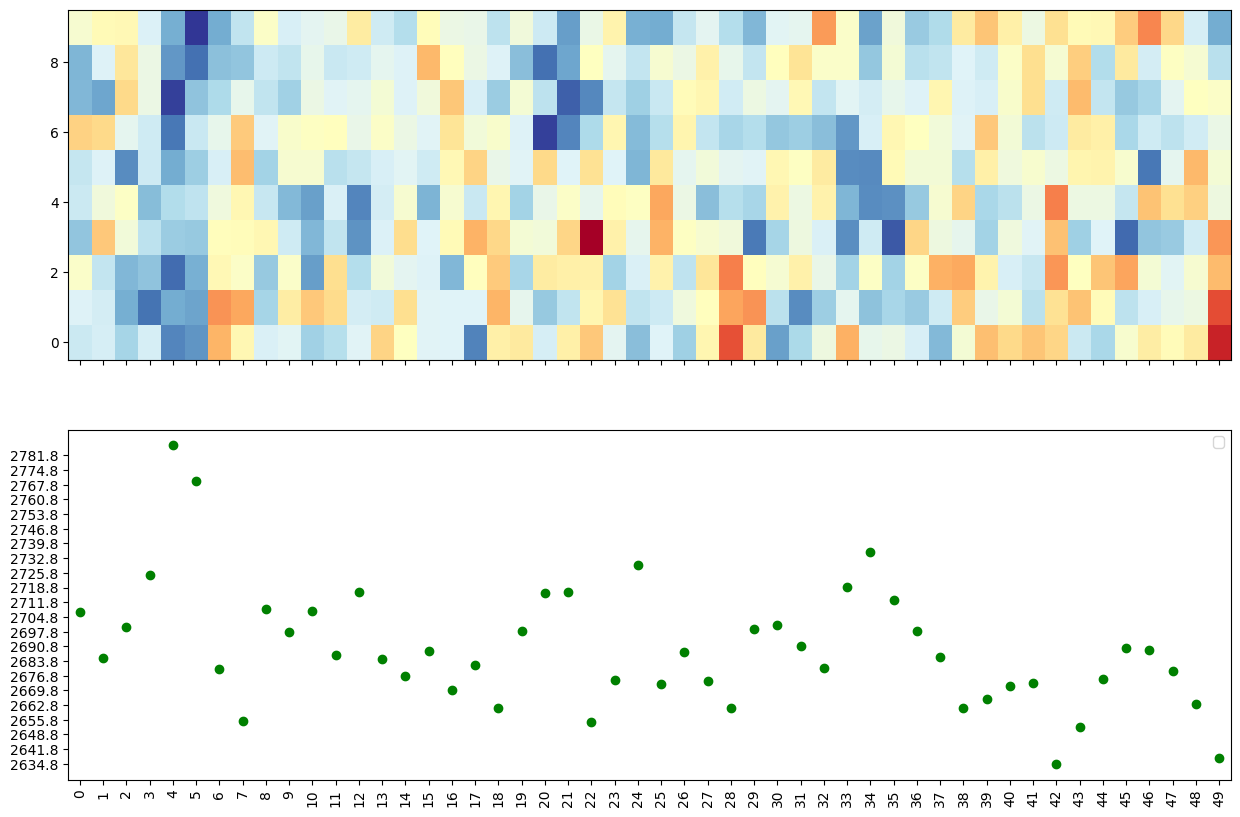

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Upper pcolormesh
w_markers_cropped = w_right
y_markers_markers_cropped = range(w_markers_cropped.shape[0])   # Rows      (this, _)
x_markers_markers_cropped = range(w_markers_cropped.shape[1])   # Columns   (_, this)

ax[0].pcolormesh(x_markers_markers_cropped, y_markers_markers_cropped, w_markers_cropped, cmap="RdYlBu")
plt.xticks(x_markers_markers_cropped, rotation=90)
plt.yticks(y_markers_markers_cropped)

# Lower scatterplot
_axis = 0 # 0 - keeps x; 1 - keeps y
w_markers_summed = w_markers_cropped.sum(axis=_axis)
x_markers_summed = np.arange(len(w_markers_summed))
## Fitted line
printMD("### **Fitting line to one marker**")
ax[1].scatter(x_markers_summed, w_markers_summed, c='green')
plt.legend()
plt.yticks(np.arange(w_markers_summed.min(), w_markers_summed.max(), 7))
plt.show()

**Results report**

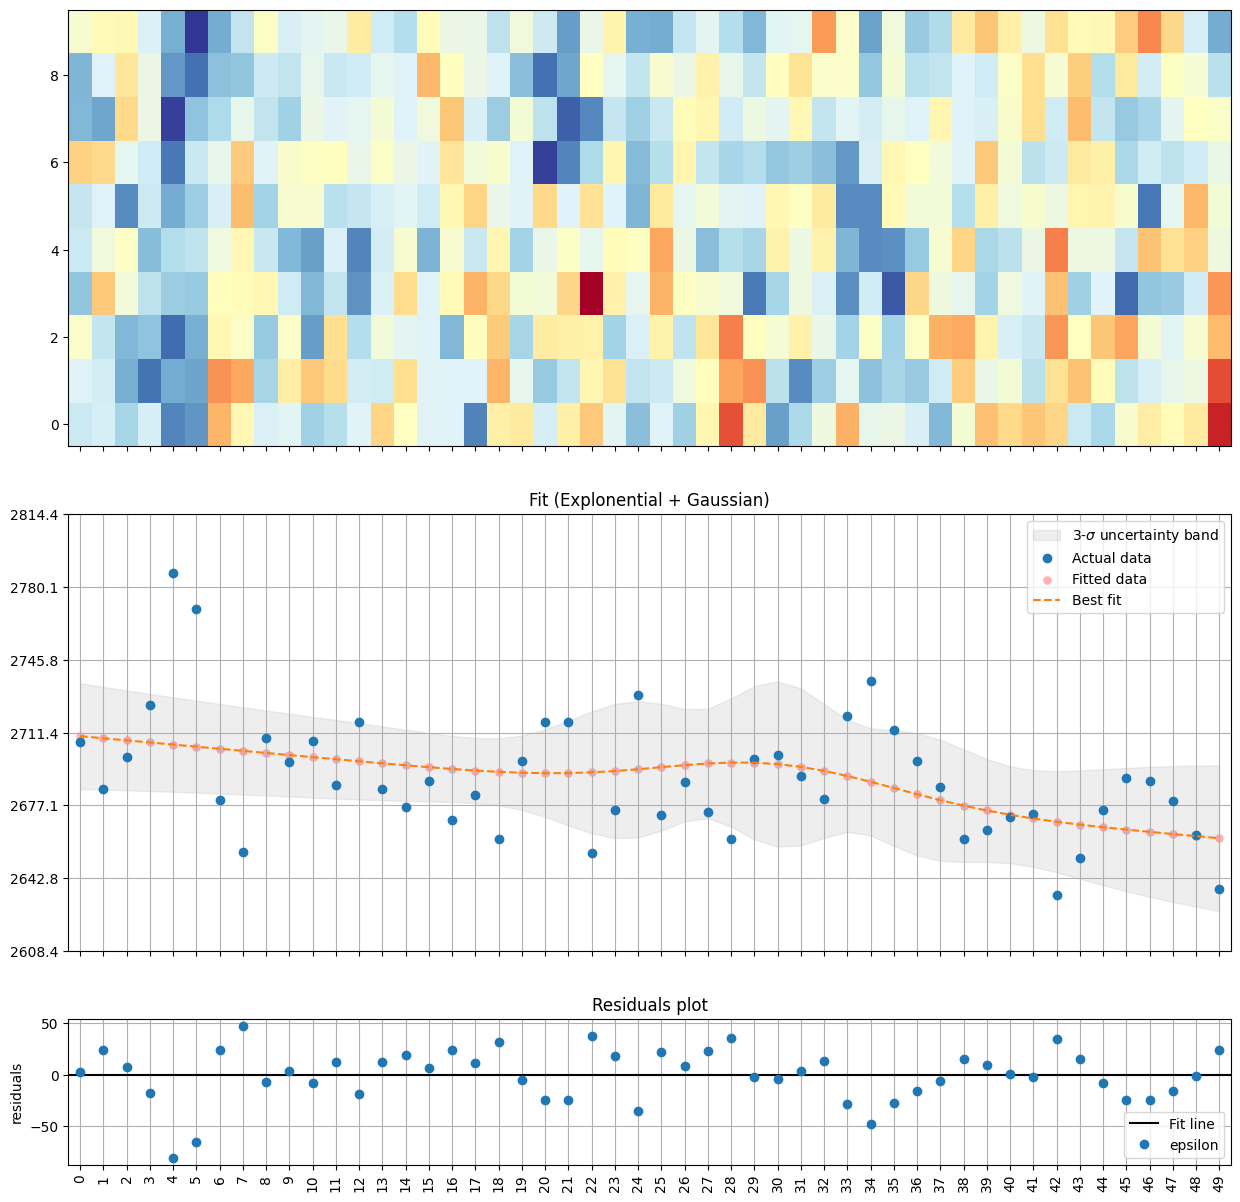

name,value,standard error,relative error,initial value,min,max,vary,expression
exp_amplitude,2709.75932,7.84592687,(0.29%),2711.0157375933577,-inf,inf,True,
exp_decay,2732.79547,846.573781,(30.98%),3090.7869430683586,-inf,inf,True,
g1_amplitude,207.451503,225.093494,(108.50%),1.0,-inf,inf,True,
g1_center,30.0000000,3.49758426,(11.66%),25,20.0000000,30.0000000,True,
g1_sigma,5.04293471,4.83076887,(95.79%),3,2.00000000,inf,True,
g1_fwhm,11.8752035,11.3755912,(95.79%),7.06446,-inf,inf,False,2.3548200*g1_sigma
g1_height,16.4113130,11.9188227,(72.63%),0.13298076666666667,-inf,inf,False,"0.3989423*g1_amplitude/max(1e-15, g1_sigma)"


In [6]:
from lmfit.models import GaussianModel, ExponentialModel

w_markers_cropped = w_right
y_markers_markers_cropped = range(w_markers_cropped.shape[0])   # Rows      (this, _)
x_markers_markers_cropped = range(w_markers_cropped.shape[1])   # Columns   (_, this)
w_markers_summed = w_markers_cropped.sum(axis=_axis)
x_markers_summed = np.arange(len(w_markers_summed))

# Model 
exp_mod = ExponentialModel(prefix='exp_')
pars = exp_mod.guess(w_markers_summed, x=x_markers_summed)

gauss1 = GaussianModel(prefix='g1_')
pars.update(gauss1.make_params())

pars['g1_center'].set(value=25, min=20, max=30)
pars['g1_sigma'].set(value=3, min=2)

mod = gauss1 + exp_mod
init = mod.eval(pars, x=x_markers_summed)
out = mod.fit(w_markers_summed, pars, x=x_markers_summed)

# Printing section
fig, ax = plt.subplots(3, 1, figsize=(15, 15), sharex=True, gridspec_kw={'height_ratios': [3, 3, 1]})

# Colormesh
printMD("**Results report**")
ax[0].pcolormesh(x_markers_markers_cropped, y_markers_markers_cropped, w_markers_cropped, cmap="RdYlBu")
plt.xticks(x_markers_markers_cropped, rotation=90)

# Fitted graph
## Uncertainty
dely = out.eval_uncertainty(sigma=3)
ax[1].fill_between(x_markers_summed, 
                 out.best_fit-dely, 
                 out.best_fit+dely, 
                 color="#ABABAB",
                 label='3-$\sigma$ uncertainty band',
                 alpha=0.2)
## Graph itself
ax[1].plot(x_markers_summed, out.data, 'o', label='Actual data')
ax[1].scatter(x_markers_summed, out.best_fit, label='Fitted data', c='r', alpha=0.3, linewidths=0.1)
ax[1].plot(x_markers_summed, out.best_fit, '--', label='Best fit')
ax[1].set_yticks(np.linspace(out.data.min()-out.data.min()*0.01, 
                             out.data.max()+out.data.max()*0.01, 
                             7))
ax[1].grid()
ax[1].set_title("Fit (Explonential + Gaussian)")
ax[1].legend()

# Residuals
out.plot_residuals(ax=ax[2], title="Residuals plot")
ax[2].grid()
ax[2].legend(['Fit line', 'epsilon'])

plt.show()

out.params

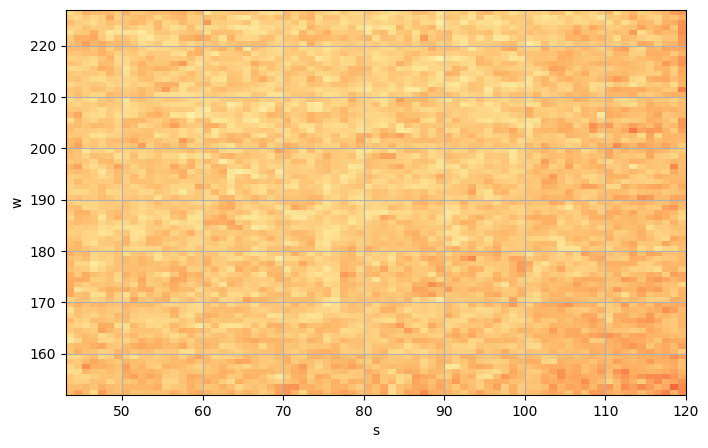

(73, 77)


In [14]:
file = uproot.open("root_files/gopa3+50-ngri+-ped.root")
w, x, y = file["h7"].to_numpy()

degree_of_rotation = -2.2
wT_rotated = ndimage.rotate(w.T, degree_of_rotation, reshape=False)

fig, ax = plt.subplots(figsize=(8, 5))
mesh = ax.pcolormesh(range(len(x)), y, wT_rotated, cmap="RdYlBu", vmin=200, vmax=400)
ax.set_xlabel("s")
ax.set_ylabel("w")
# ax.set_ylim(2, 75)
ax.set_ylim(152, 227)
ax.set_xlim(43, 120)
# fig.colorbar(mesh)
plt.grid()
plt.show()
print(wT_rotated[2:75, 43:120].shape)

In [15]:
degree_of_rotation = 2.2

file = uproot.open("root_files/gopa3+50-ngri+-ped.root")
w, _1, _2 = file["h7"].to_numpy()

w_new = ndimage.rotate(w, degree_of_rotation, reshape=False).T

y = range(w_new.shape[0])   # Rows
x = range(w_new.shape[1])   # Columns

print(w_new.shape)

(400, 124)


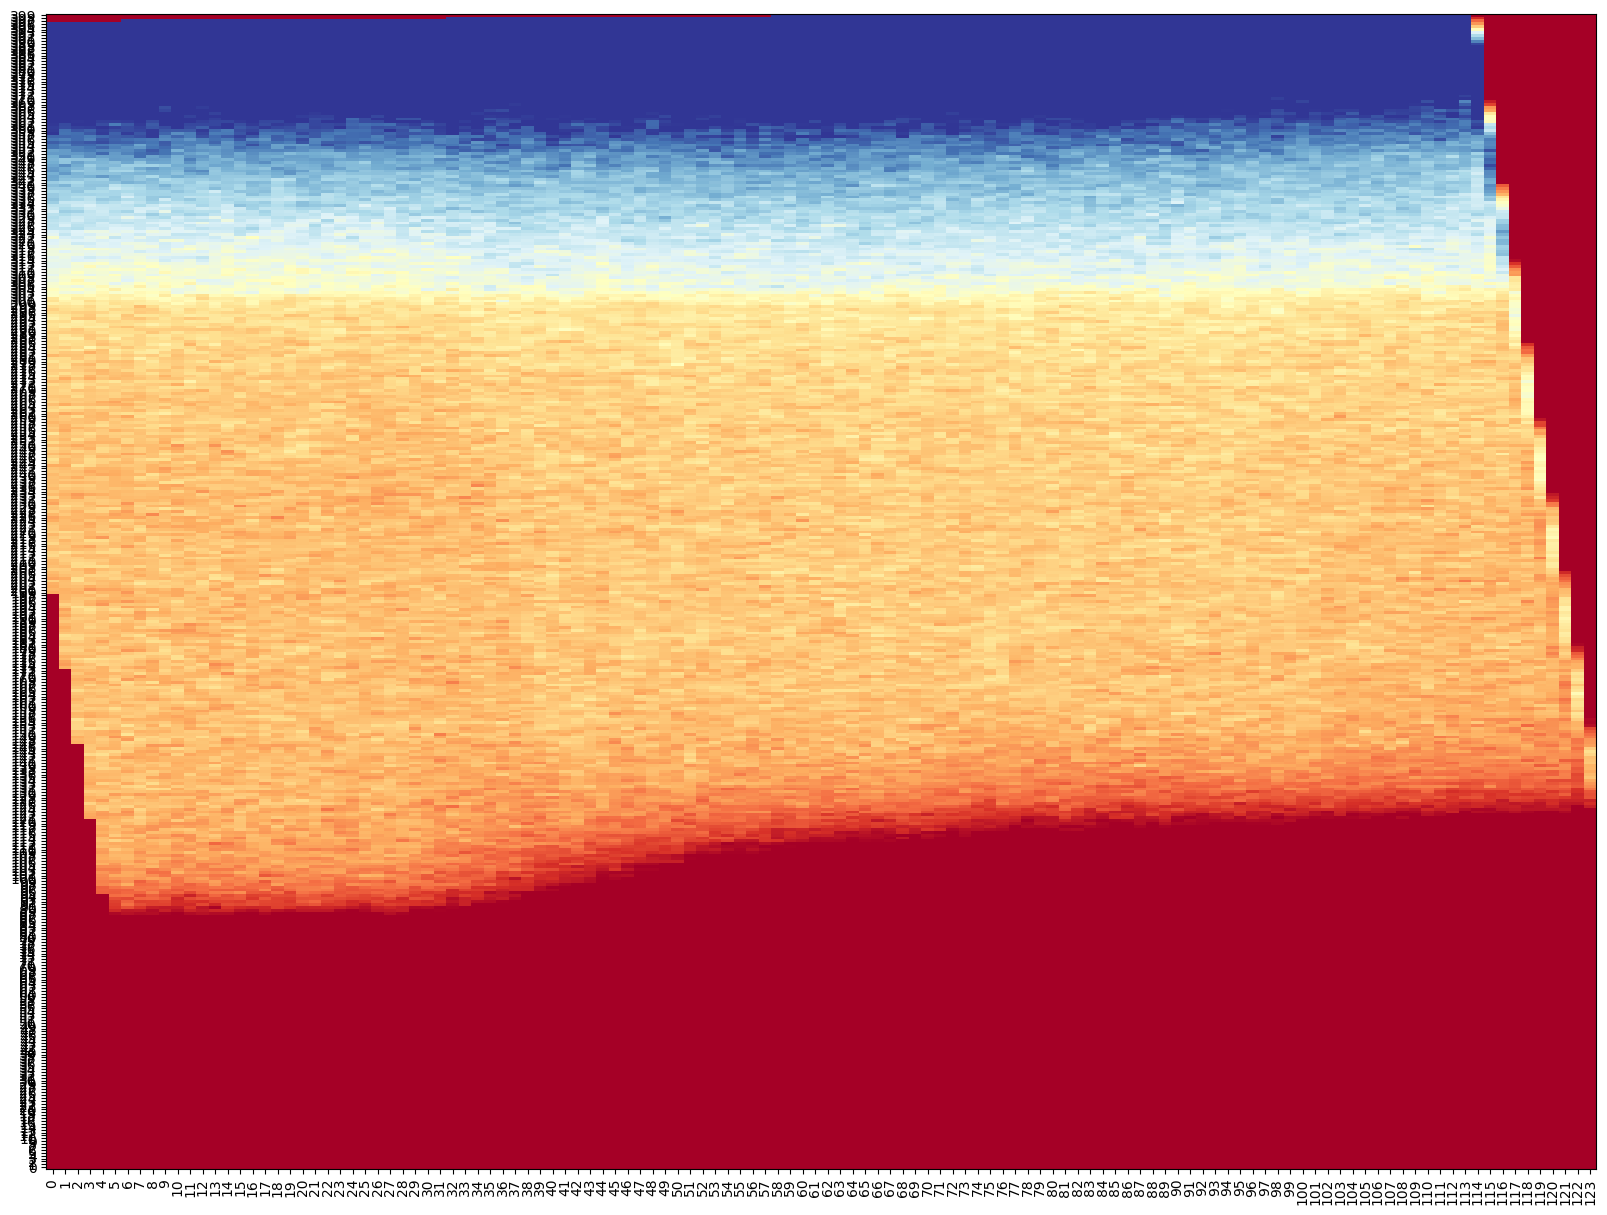

In [16]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.pcolormesh(x, y, w_new, cmap="RdYlBu", vmin=200, vmax=400)
plt.xticks(x, rotation=90)
plt.yticks(y)
plt.show()

### **Fitting line to one marker**

Coefficient of 2nd degree polynomial:  [ 7.65828435e-03 -1.30641480e+00  2.71304247e+03]


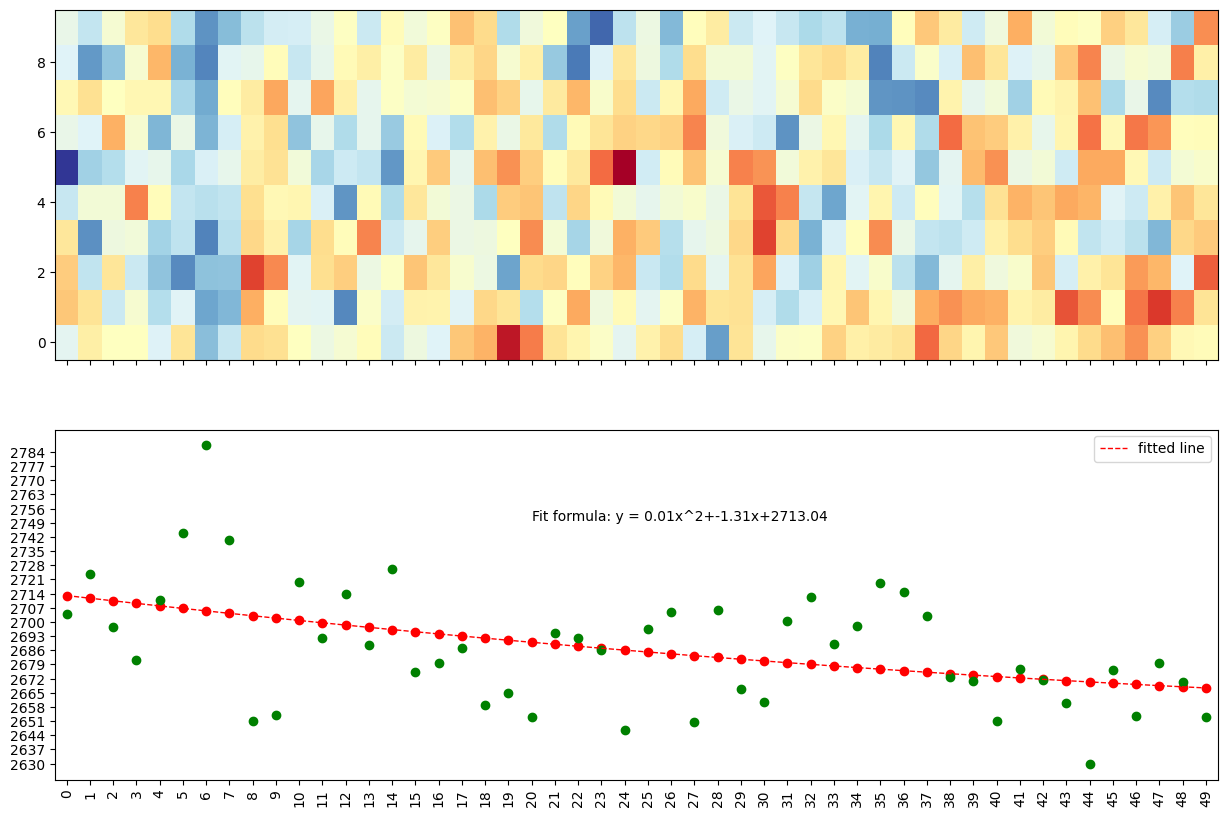

In [17]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Upper pcolormesh
w_markers = w_new[152:225, 45:119]
w_markers_cropped = w_markers[21:31, 24:]
y_markers_markers_cropped = range(w_markers_cropped.shape[0])   # Rows      (this, _)
x_markers_markers_cropped = range(w_markers_cropped.shape[1])   # Columns   (_, this)

ax[0].pcolormesh(x_markers_markers_cropped, y_markers_markers_cropped, w_markers_cropped, cmap="RdYlBu")
plt.xticks(x_markers_markers_cropped, rotation=90)
plt.yticks(y_markers_markers_cropped)

# Lower scatterplot
_axis = 0 # 0 - keeps x; 1 - keeps y
w_markers_summed = w_markers_cropped.sum(axis=_axis)
x_markers_summed = np.arange(len(w_markers_summed))
## Fitted line
printMD("### **Fitting line to one marker**")
z = np.polyfit(x_markers_summed, w_markers_summed, 2, full=False, cov=False)
print("Coefficient of 2nd degree polynomial: ",z)
y_pred = z[0]*x_markers_summed**2+z[1]*x_markers_summed+z[-1]
ax[1].scatter(x_markers_summed, y_pred, c='r')
ax[1].plot(x_markers_summed, y_pred, '--', lw=1, c='r', label='fitted line')
ax[1].text(20, 2750, f'Fit formula: y = {z[0]:.2f}x^2+{z[1]:.2f}x+{z[-1]:.2f}', size=10, c='k')
## Actual data
ax[1].scatter(x_markers_summed, w_markers_summed, c='green')
# ax[1].plot(x_markers_summed, w_markers_summed, '--', lw=1, c='green', label='data')
plt.legend()
plt.yticks(np.arange(w_markers_summed.min(), w_markers_summed.max(), 7))
# plt.grid()
plt.show()

**Results report**

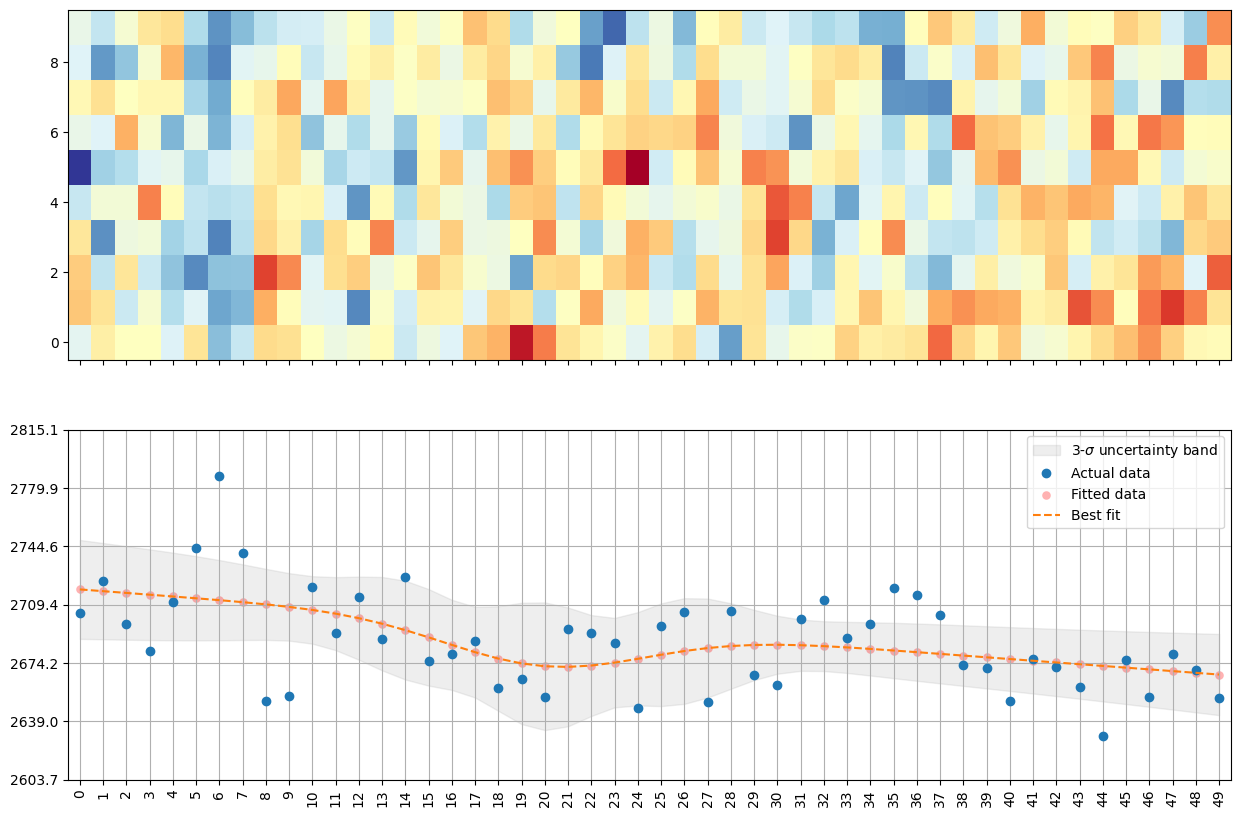

name,value,standard error,relative error,initial value,min,max,vary,expression
exp_amplitude,2718.53677,9.41109271,(0.35%),2709.877142195588,-inf,inf,True,
exp_decay,2566.60115,679.166116,(26.46%),2898.241936879711,-inf,inf,True,
g1_amplitude,-276.309154,181.037558,(65.52%),1.0,-inf,inf,True,
g1_center,20.0000000,2.46132619,(12.31%),25,20.0000000,30.0000000,True,
g1_sigma,4.35745200,2.67862585,(61.47%),3,2.00000000,inf,True,
g1_fwhm,10.2610151,6.30768173,(61.47%),7.06446,-inf,inf,False,2.3548200*g1_sigma
g1_height,-25.2972171,12.2548505,(48.44%),0.13298076666666667,-inf,inf,False,"0.3989423*g1_amplitude/max(1e-15, g1_sigma)"


In [4]:
from lmfit.models import GaussianModel, ExponentialModel

# Data
_axis = 0 # 0 - keeps x; 1 - keeps y
w_markers = w_new[152:225, 45:119]
w_markers_cropped = w_markers[21:31, 24:]

w_markers_summed = w_markers_cropped.sum(axis=_axis)
x_markers_summed = np.arange(len(w_markers_summed))

# Model 
exp_mod = ExponentialModel(prefix='exp_')
pars = exp_mod.guess(w_markers_summed, x=x_markers_summed)

gauss1 = GaussianModel(prefix='g1_')
pars.update(gauss1.make_params())

pars['g1_center'].set(value=25, min=20, max=30)
pars['g1_sigma'].set(value=3, min=2)

mod = gauss1 + exp_mod
init = mod.eval(pars, x=x_markers_summed)
out = mod.fit(w_markers_summed, pars, x=x_markers_summed)

# Printing section
fig, ax = plt.subplots(3, 1, figsize=(15, 10), sharex=True)
ax[0].pcolormesh(x_markers_markers_cropped, y_markers_markers_cropped, w_markers_cropped, cmap="RdYlBu")
plt.xticks(x_markers_markers_cropped, rotation=90)
plt.yticks(y_markers_markers_cropped)


printMD("**Results report**")



dely = out.eval_uncertainty(sigma=3)

ax[1].fill_between(x_markers_summed, 
                 out.best_fit-dely, 
                 out.best_fit+dely, 
                 color="#ABABAB",
                 label='3-$\sigma$ uncertainty band',
                 alpha=0.2)

ax[1].plot(x_markers_summed, out.data, 'o', label='Actual data')
ax[1].scatter(x_markers_summed, out.best_fit, label='Fitted data', c='r', alpha=0.3, linewidths=0.1)
ax[1].plot(x_markers_summed, out.best_fit, '--', label='Best fit')
ax[1].set_yticks(np.linspace(out.data.min()-out.data.min()*0.01, 
                             out.data.max()+out.data.max()*0.01, 
                             7))
plt.grid()
plt.legend()
plt.show()

out.params

In [28]:
out.best_values

{'exp_amplitude': 2718.5367658551622,
 'exp_decay': 2566.60114818333,
 'g1_amplitude': -276.30915376655037,
 'g1_center': 20.00000001130853,
 'g1_sigma': 4.357452001142317}

In [9]:
import numpy as np
from lmfit.models import PowerLawModel, ExponentialModel, GaussianModel


mod_expon = ExponentialModel(prefix='exp_')
# mod_gauss = GaussianModel(prefix='g1_')

# sum components to make a composite model (add more if needed)
model  = mod_expon

# create fitting parameters by name, give initial values
# params = model.make_params(g1_amplitude=5, g1_center=55, g1_sigma=5, 
#                            exp_amplitude=5, exp_decay=10)

params = model.guess(w_markers_summed, x=x_markers_summed)
# pars = mod.make_params(amp=1925, cen=5, wid=5)

# result = mod.fit(w_markers_summed, pars, x=x_markers_summed)

# do fit
result = model.fit(w_markers_summed, params, x=x_markers_summed)

# print out fitting statistics, best-fit parameters, uncertainties,....
result.fit_report()

"[[Model]]\n    Model(exponential, prefix='exp_')\n[[Fit Statistics]]\n    # fitting method   = leastsq\n    # function evals   = 7\n    # data points      = 50\n    # variables        = 2\n    chi-square         = 34470.9053\n    reduced chi-square = 718.143860\n    Akaike info crit   = 330.792396\n    Bayesian info crit = 334.616442\n    R-squared          = 0.20762726\n[[Variables]]\n    exp_amplitude:  2710.11450 +/- 7.49812795 (0.28%) (init = 2709.877)\n    exp_decay:      2884.52965 +/- 813.137655 (28.19%) (init = 2898.242)\n[[Correlations]] (unreported correlations are < 0.100)\n    C(exp_amplitude, exp_decay) = -0.860"

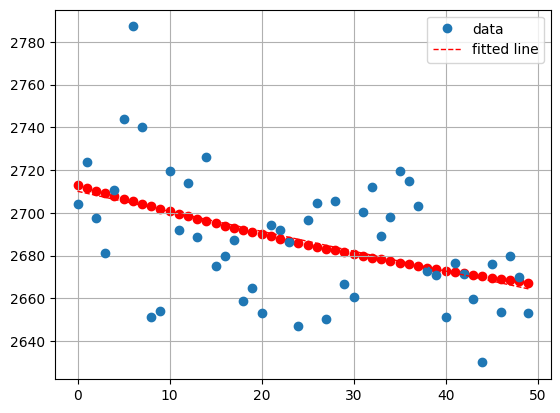

In [13]:
plt.plot(x_markers_summed, w_markers_summed, 'o', label='data')
plt.scatter(x_markers_summed, y_pred, c='r')
plt.plot(x_markers_summed, result.best_fit, '--', lw=1, c='r', label='fitted line')
# plt.plot(x_markers_summed, result.init_fit, '--', label='initial fit')
# plt.plot(x_markers_summed, result.best_fit, '--', label='best fit')
plt.legend()
plt.grid()
plt.show()

In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.optimize import curve_fit
import pandas as pd
import seaborn as sns
from my_utils.my_utils import printMD, fit_my_data

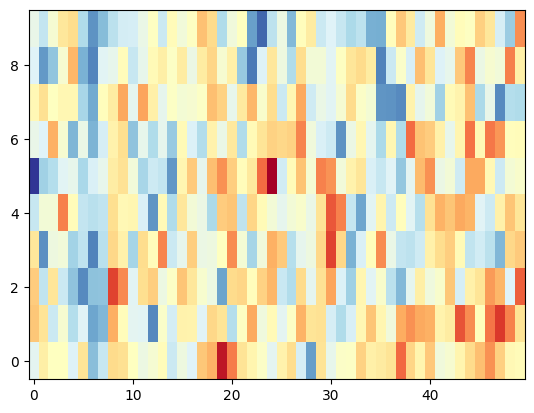

In [2]:
degree_of_rotation = 2.2

file = uproot.open("root_files/gopa3+50-ngri+-ped.root")
w, _1, _2 = file["h7"].to_numpy()

w_new = ndimage.rotate(w, degree_of_rotation, reshape=False).T

w_markers = w_new[152:225, 45:119]
w_markers_cropped = w_markers[21:31, 24:]

y_markers_markers_cropped = range(w_markers_cropped.shape[0])   # Rows      (this, _)
x_markers_markers_cropped = range(w_markers_cropped.shape[1])   # Columns   (_, this)

plt.pcolormesh(x_markers_markers_cropped, y_markers_markers_cropped, w_markers_cropped, cmap="RdYlBu")

**Results report**

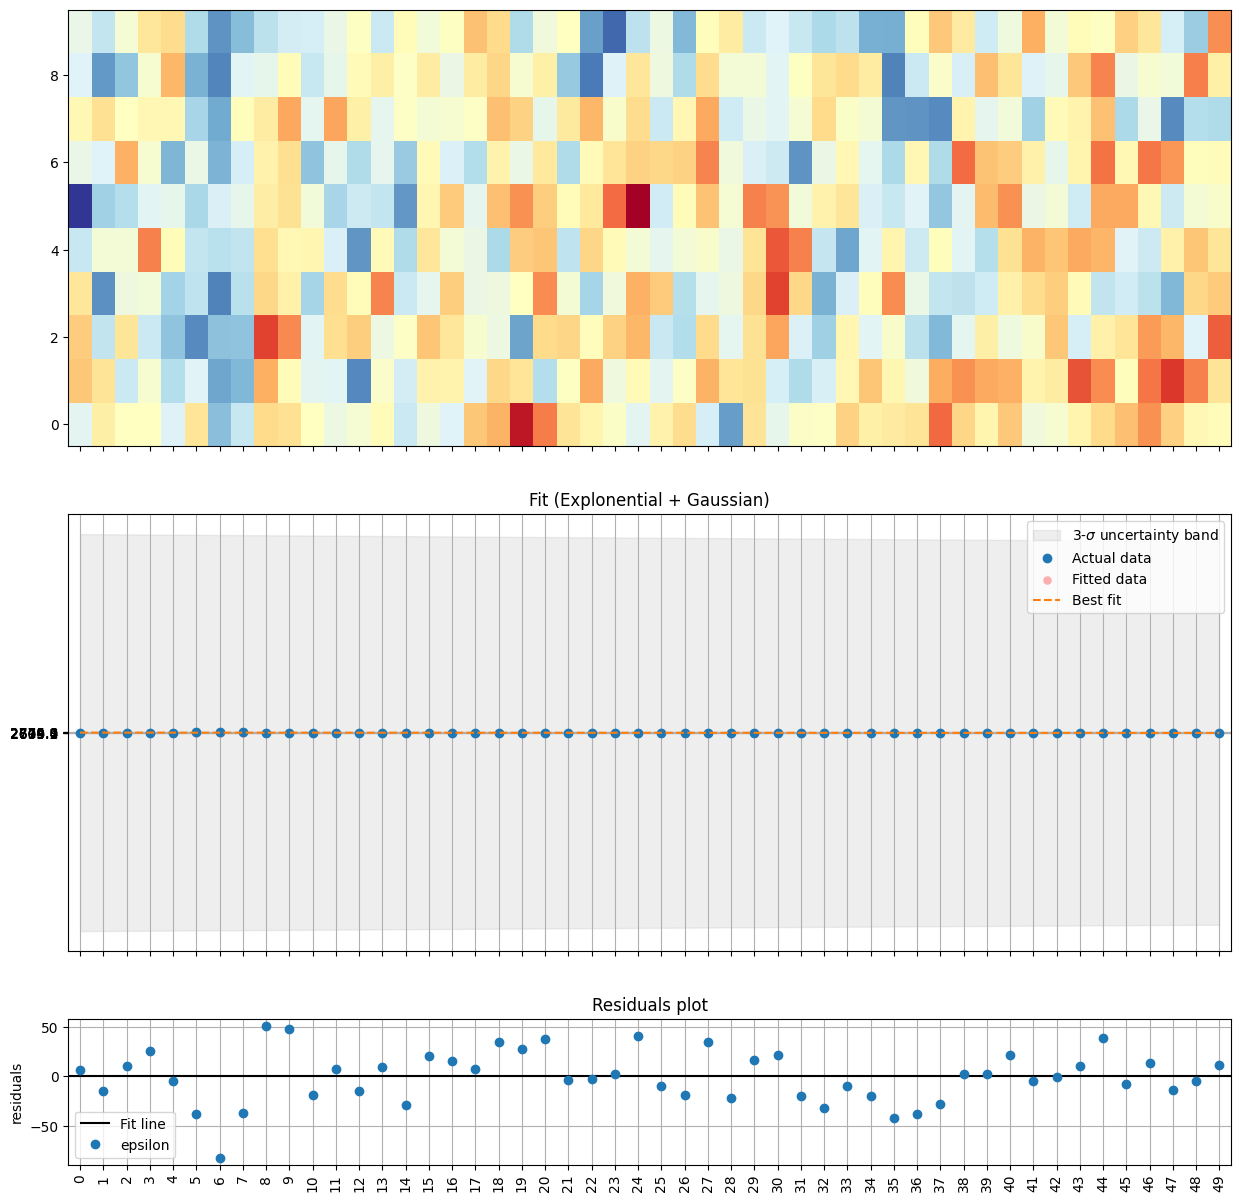

In [3]:
pars = fit_my_data(w_markers_cropped)